In [1]:
import os
import json
import gzip
import pandas as pd
import numpy as np

In [2]:
with gzip.open(os.path.join("..", "data", "country_data.json.gz")) as f:
    country_data = json.loads(f.read())

# Apply income classification system from World Bank

In [3]:
# Classification of countries for bias analysis:
# World Bank 2025 classification of countries by income: https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups
with open("worldbank_country_classification_march2025.json") as f:  
    country_income_class_dict = json.load(f) 

In [4]:
country_income_class_dict.keys()

dict_keys(['low_income', 'lower-middle_income', 'upper-middle_income', 'high_income'])

In [5]:
# Num. of countries in total
len(country_data["countries"])

273

In [6]:
def get_country_income_class(country_id):
    for income_class in country_income_class_dict.keys():
        if country_id in country_income_class_dict[income_class]:
            return income_class
        else:
            continue
    return "undefined"

In [7]:
# How many properties per country? 
property_counts_per_country = {}
for country in country_data["countries"]:
    property_counts_per_country[country["label"]] = {}
    property_counts_per_country[country["label"]]["country_id"] = country["id"]
    property_counts_per_country[country["label"]]["income_class"] = get_country_income_class(country["id"])
    property_counts_per_country[country["label"]]["num_incoming_claims"] = len(country["incoming_claims"])
    property_counts_per_country[country["label"]]["num_outgoing_claims"] = len(country["outgoing_claims"])

"Note: Venezuela, RB classified as an upper-middle income country until FY21, has been unclassified since then due to the unavailability of data." (https://datahelpdesk.worldbank.org/knowledgebase/articles/906519) 

In [8]:
# "undefined" countries are not included in the Worldbank classification system and refer to historically sovereign states
num_undefined = 0
for country, properties in property_counts_per_country.items():
    if properties["income_class"] == "undefined":
        num_undefined += 1
print("Number of undefined countries: ", num_undefined)

Number of undefined countries:  81


Observation: Many of the countries extracted from Wikidata are not/no longer existing or sovereign states

## Number of incoming and outgoing claims per country, grouped by income class

In [9]:
# Per country
property_counts_per_country_df = pd.DataFrame.from_dict(property_counts_per_country, orient="index")
property_counts_per_country_df

,country_id,income_class,num_incoming_claims,num_outgoing_claims
Belgium,Q31,high_income,85,129
Portugal,Q45,high_income,80,115
People's Republic of China,Q148,upper-middle_income,100,117
Brazil,Q155,upper-middle_income,81,119
Germany,Q183,high_income,119,124
...,...,...,...,...
Cisalpine Republic,Q213353,undefined,15,18
Bechuanaland Protectorate,Q747314,undefined,14,16
Tibet,Q2444884,undefined,20,23
Interwar Lithuania,Q8272919,undefined,13,19


In [10]:
property_counts_per_country_df.sort_values(by="num_incoming_claims", ascending=False)

,country_id,income_class,num_incoming_claims,num_outgoing_claims
United States,Q30,high_income,148,130
France,Q142,high_income,126,127
Germany,Q183,high_income,119,124
Russia,Q159,high_income,119,128
Soviet Union,Q15180,undefined,114,71
...,...,...,...,...
Havilah,Q124536190,undefined,0,2
Serendip,Q3479157,undefined,0,4
Reman,Q115166787,undefined,0,7
Unyasa,Q13125117,undefined,0,3


In [17]:
property_counts_per_country_df.loc[property_counts_per_country_df["income_class"] != "undefined", :].sort_values(by="num_incoming_claims", ascending=True)


,country_id,income_class,num_incoming_claims,num_outgoing_claims
Sint Maarten,Q26273,high_income,30,60
Northern Cyprus,Q23681,high_income,31,46
Saint Kitts and Nevis,Q763,high_income,35,83
Tuvalu,Q672,upper-middle_income,35,78
Antigua and Barbuda,Q781,high_income,36,81
...,...,...,...,...
Italy,Q38,high_income,110,120
Russia,Q159,high_income,119,128
Germany,Q183,high_income,119,124
France,Q142,high_income,126,127


In [11]:
property_counts_per_country_df.sort_values(by="num_outgoing_claims", ascending=False)


,country_id,income_class,num_incoming_claims,num_outgoing_claims
Australia,Q408,high_income,89,150
Japan,Q17,high_income,100,136
Czech Republic,Q213,high_income,85,131
United States,Q30,high_income,148,130
Canada,Q16,high_income,96,130
...,...,...,...,...
Free Republic of the Congo,Q28406119,undefined,0,2
Ashkenaz,Q124535978,undefined,0,2
Havilah,Q124536190,undefined,0,2
Persia,Q125422413,undefined,0,2


In [14]:
property_counts_per_country_df.loc[property_counts_per_country_df["income_class"] == "low_income", :].sort_values(by="num_incoming_claims", ascending=False)

,country_id,income_class,num_incoming_claims,num_outgoing_claims
Syria,Q858,low_income,68,101
Afghanistan,Q889,low_income,61,107
North Korea,Q423,low_income,60,97
Sudan,Q1049,low_income,57,94
Uganda,Q1036,low_income,57,91
Democratic Republic of the Congo,Q974,low_income,57,100
Ethiopia,Q115,low_income,56,98
Yemen,Q805,low_income,53,102
Burkina Faso,Q965,low_income,49,95
Rwanda,Q1037,low_income,49,88


In [15]:
property_counts_per_country_df.loc[property_counts_per_country_df["income_class"] == "low_income", :].sort_values(
    by="num_outgoing_claims", ascending=False)

,country_id,income_class,num_incoming_claims,num_outgoing_claims
Afghanistan,Q889,low_income,61,107
Yemen,Q805,low_income,53,102
Syria,Q858,low_income,68,101
Democratic Republic of the Congo,Q974,low_income,57,100
Mozambique,Q1029,low_income,47,98
Sierra Leone,Q1044,low_income,47,98
Ethiopia,Q115,low_income,56,98
North Korea,Q423,low_income,60,97
Niger,Q1032,low_income,47,96
Chad,Q657,low_income,41,95


### Average in-degree per income class

In [87]:
property_counts_per_country_df.groupby("income_class")["num_incoming_claims"].describe().reindex(
    ["high_income", "upper-middle_income","lower-middle_income", "low_income", "undefined"])

,count,mean,std,min,25%,50%,75%,max
income_class,,,,,,,,
high_income,66.0,70.090909,24.533009,30.0,49.25,68.5,83.00,148.0
upper-middle_income,52.0,59.807692,16.285490,35.0,46.00,58.0,71.00,100.0
lower-middle_income,48.0,54.770833,12.507427,39.0,44.75,52.0,62.25,100.0
low_income,25.0,49.360000,7.515983,38.0,45.00,48.0,56.00,68.0
undefined,81.0,21.148148,22.460026,0.0,4.00,14.0,33.00,114.0


### Average out-degree per income class

In [88]:
property_counts_per_country_df.groupby("income_class")["num_outgoing_claims"].describe().reindex(
    ["high_income", "upper-middle_income","lower-middle_income", "low_income", "undefined"])

,count,mean,std,min,25%,50%,75%,max
income_class,,,,,,,,
high_income,66.0,105.893939,18.554808,46.0,95.25,108.0,116.0,150.0
upper-middle_income,52.0,100.346154,10.437272,78.0,95.75,100.0,110.0,120.0
lower-middle_income,48.0,99.354167,8.731185,84.0,94.00,98.5,103.0,125.0
low_income,25.0,94.160000,5.742241,79.0,91.00,94.0,98.0,107.0
undefined,81.0,24.716049,22.787186,1.0,9.00,18.0,30.0,101.0


Observation: The average number of incoming and outgoing claims seems to correspond with the countries level of income. However, that standard deviation is also higher with higher mean. A significance test might be indicated to check if the differences are meaningful.

# Exploring occurrence of outgoing claims across countries

In [89]:
# How many countries per property?
pid_frequencies_across_countries = {}
for country in country_data["countries"]:
    pids = list(country["outgoing_claims"].keys())
    for pid in pids:
        if pid in country_data["pid_labels"]:
            label = country_data["pid_labels"][pid]
        else:
            label = "undefined"
            print(pid)
        if pid not in pid_frequencies_across_countries:
            pid_frequencies_across_countries[pid] = {"label": label, "sum": 1, "countries": [country["label"]]}
        else: 
            pid_frequencies_across_countries[pid]["sum"] += 1
            pid_frequencies_across_countries[pid]["countries"].append(country["label"])


In [90]:
pid_frequencies_across_countries_df = pd.DataFrame.from_dict(pid_frequencies_across_countries, orient="index").sort_values(by="sum", ascending=False)
pid_frequencies_across_countries_df

,label,sum,countries
P31,instance of,273,"[Belgium, Portugal, People's Republic of China..."
P571,inception,256,"[Belgium, Portugal, People's Republic of China..."
P30,continent,251,"[Belgium, Portugal, People's Republic of China..."
P36,capital,249,"[Belgium, Portugal, People's Republic of China..."
P373,Commons category,246,"[Belgium, Portugal, People's Republic of China..."
...,...,...,...
P2547,perimeter,1,[Australia]
P2049,width,1,[Australia]
P6364,official color,1,[Australia]
P1410,number of seats in legislature,1,[Catalonia]


In [91]:
# Get only properties that occur more than 200 times
popular_properties = pid_frequencies_across_countries_df.loc[pid_frequencies_across_countries_df["sum"] > 200, "label"]

In [92]:
# Initialize df to encode which countries have which properties
countries_by_properties_df = pd.DataFrame(data=0, index=property_counts_per_country_df.index, 
                                          columns=["income_class"] + list(pid_frequencies_across_countries_df["label"]))
countries_by_properties_df["income_class"] = property_counts_per_country_df["income_class"]
for pid in countries_by_properties_df.columns[1:]:
    for country in pid_frequencies_across_countries_df.loc[pid_frequencies_across_countries_df["label"] == pid, "countries"]:
        countries_by_properties_df.loc[country, pid] = 1

In [93]:
# Percentage of countries with that property grouped by income class
countries_by_properties_df.groupby("income_class").apply(lambda x: x.sum()/len(x)*100).reindex(
    ["high_income", "upper-middle_income","lower-middle_income", "low_income", "undefined"])

,instance of,inception,continent,capital,Commons category,topic's main category,coordinate location,official language,language used,currency,...,designated as terrorist by,subclass of,Köppen climate classification,capital of,length,perimeter,width,official color,number of seats in legislature,McCune-Reischauer romanization
income_class,,,,,,,,,,,,,,,,,,,,,
high_income,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,98.484848,100.000000,...,1.515152,0.000000,1.515152,1.515152,1.515152,1.515152,1.515152,1.515152,0.000000,1.515152
upper-middle_income,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,98.076923,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lower-middle_income,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
low_income,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
undefined,100.0,80.246914,72.839506,71.604938,67.901235,67.901235,65.432099,59.259259,54.320988,50.617284,...,0.000000,1.234568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.234568,0.000000


Observations:
- "basic form of government": only 50% for low income, much more present for higher to high income countries
- "Democracy Index" and "Gini coefficient" slightly more present for lower income countries
- "age of majority", "significant event", "honorary citizens" are more examples where there is a visual correlation: lower income = less reported

Suggestion:
We could select all properties that most countries share (decide cut-off) and do the Fact Checking across the board. Seems more useful than cherry-picking - given that we anyways do the fact-checking automatically!

In [94]:
from matplotlib import pyplot as plt
from collections import defaultdict

country_references_stats = defaultdict(lambda: defaultdict(lambda:defaultdict(int)))
common_reference_pids = defaultdict(int)
statements_with_reference = 0
statement_references = []
for country in country_data["countries"]:
    category = get_country_income_class(country["id"])
    for pid, outgoing_claim in country["outgoing_claims"].items():
        for claim in outgoing_claim:
            if "references" in claim:
                reference_pids = set()
                for reference in claim["references"]:
                    reference_pids.update(set(reference["snaks"]))
                for snak in reference_pids:
                    common_reference_pids[snak] += 1
                    country_references_stats[category][pid][snak] += 1
                statements_with_reference += 1
                statement_references.append(reference_pids)
                country_references_stats[category][pid]["total_with_ref"] += 1
            country_references_stats[category][pid]["total"] += 1

common_reference_pids = sorted(common_reference_pids.items(), key=lambda x: x[1], reverse=True)

overall_stats = {}
for key, value in country_references_stats.items():
    overall_total = 0
    stats = defaultdict(int)
    for rel_pid, rel_value in value.items():
        for pid, count in rel_value.items():
            if pid != "total":
                stats[pid] += count
                # rel_value[pid] /= rel_value["total"]
            else:
                stats["total"] += count

    for pid, count in stats.items():
        if pid != "total":
            stats[pid] /= stats["total"]
    overall_stats[key] = dict(sorted(stats.items(), key=lambda x: x[1], reverse=True))

new_country_references_stats = {}
for key, value in country_references_stats.items():
    for rel_pid, rel_value in value.items():
        if rel_pid not in new_country_references_stats:
            new_country_references_stats[rel_pid] = {}
        new_country_references_stats[rel_pid][key] = dict(sorted(rel_value.items(), key=lambda x: x[1], reverse=True))



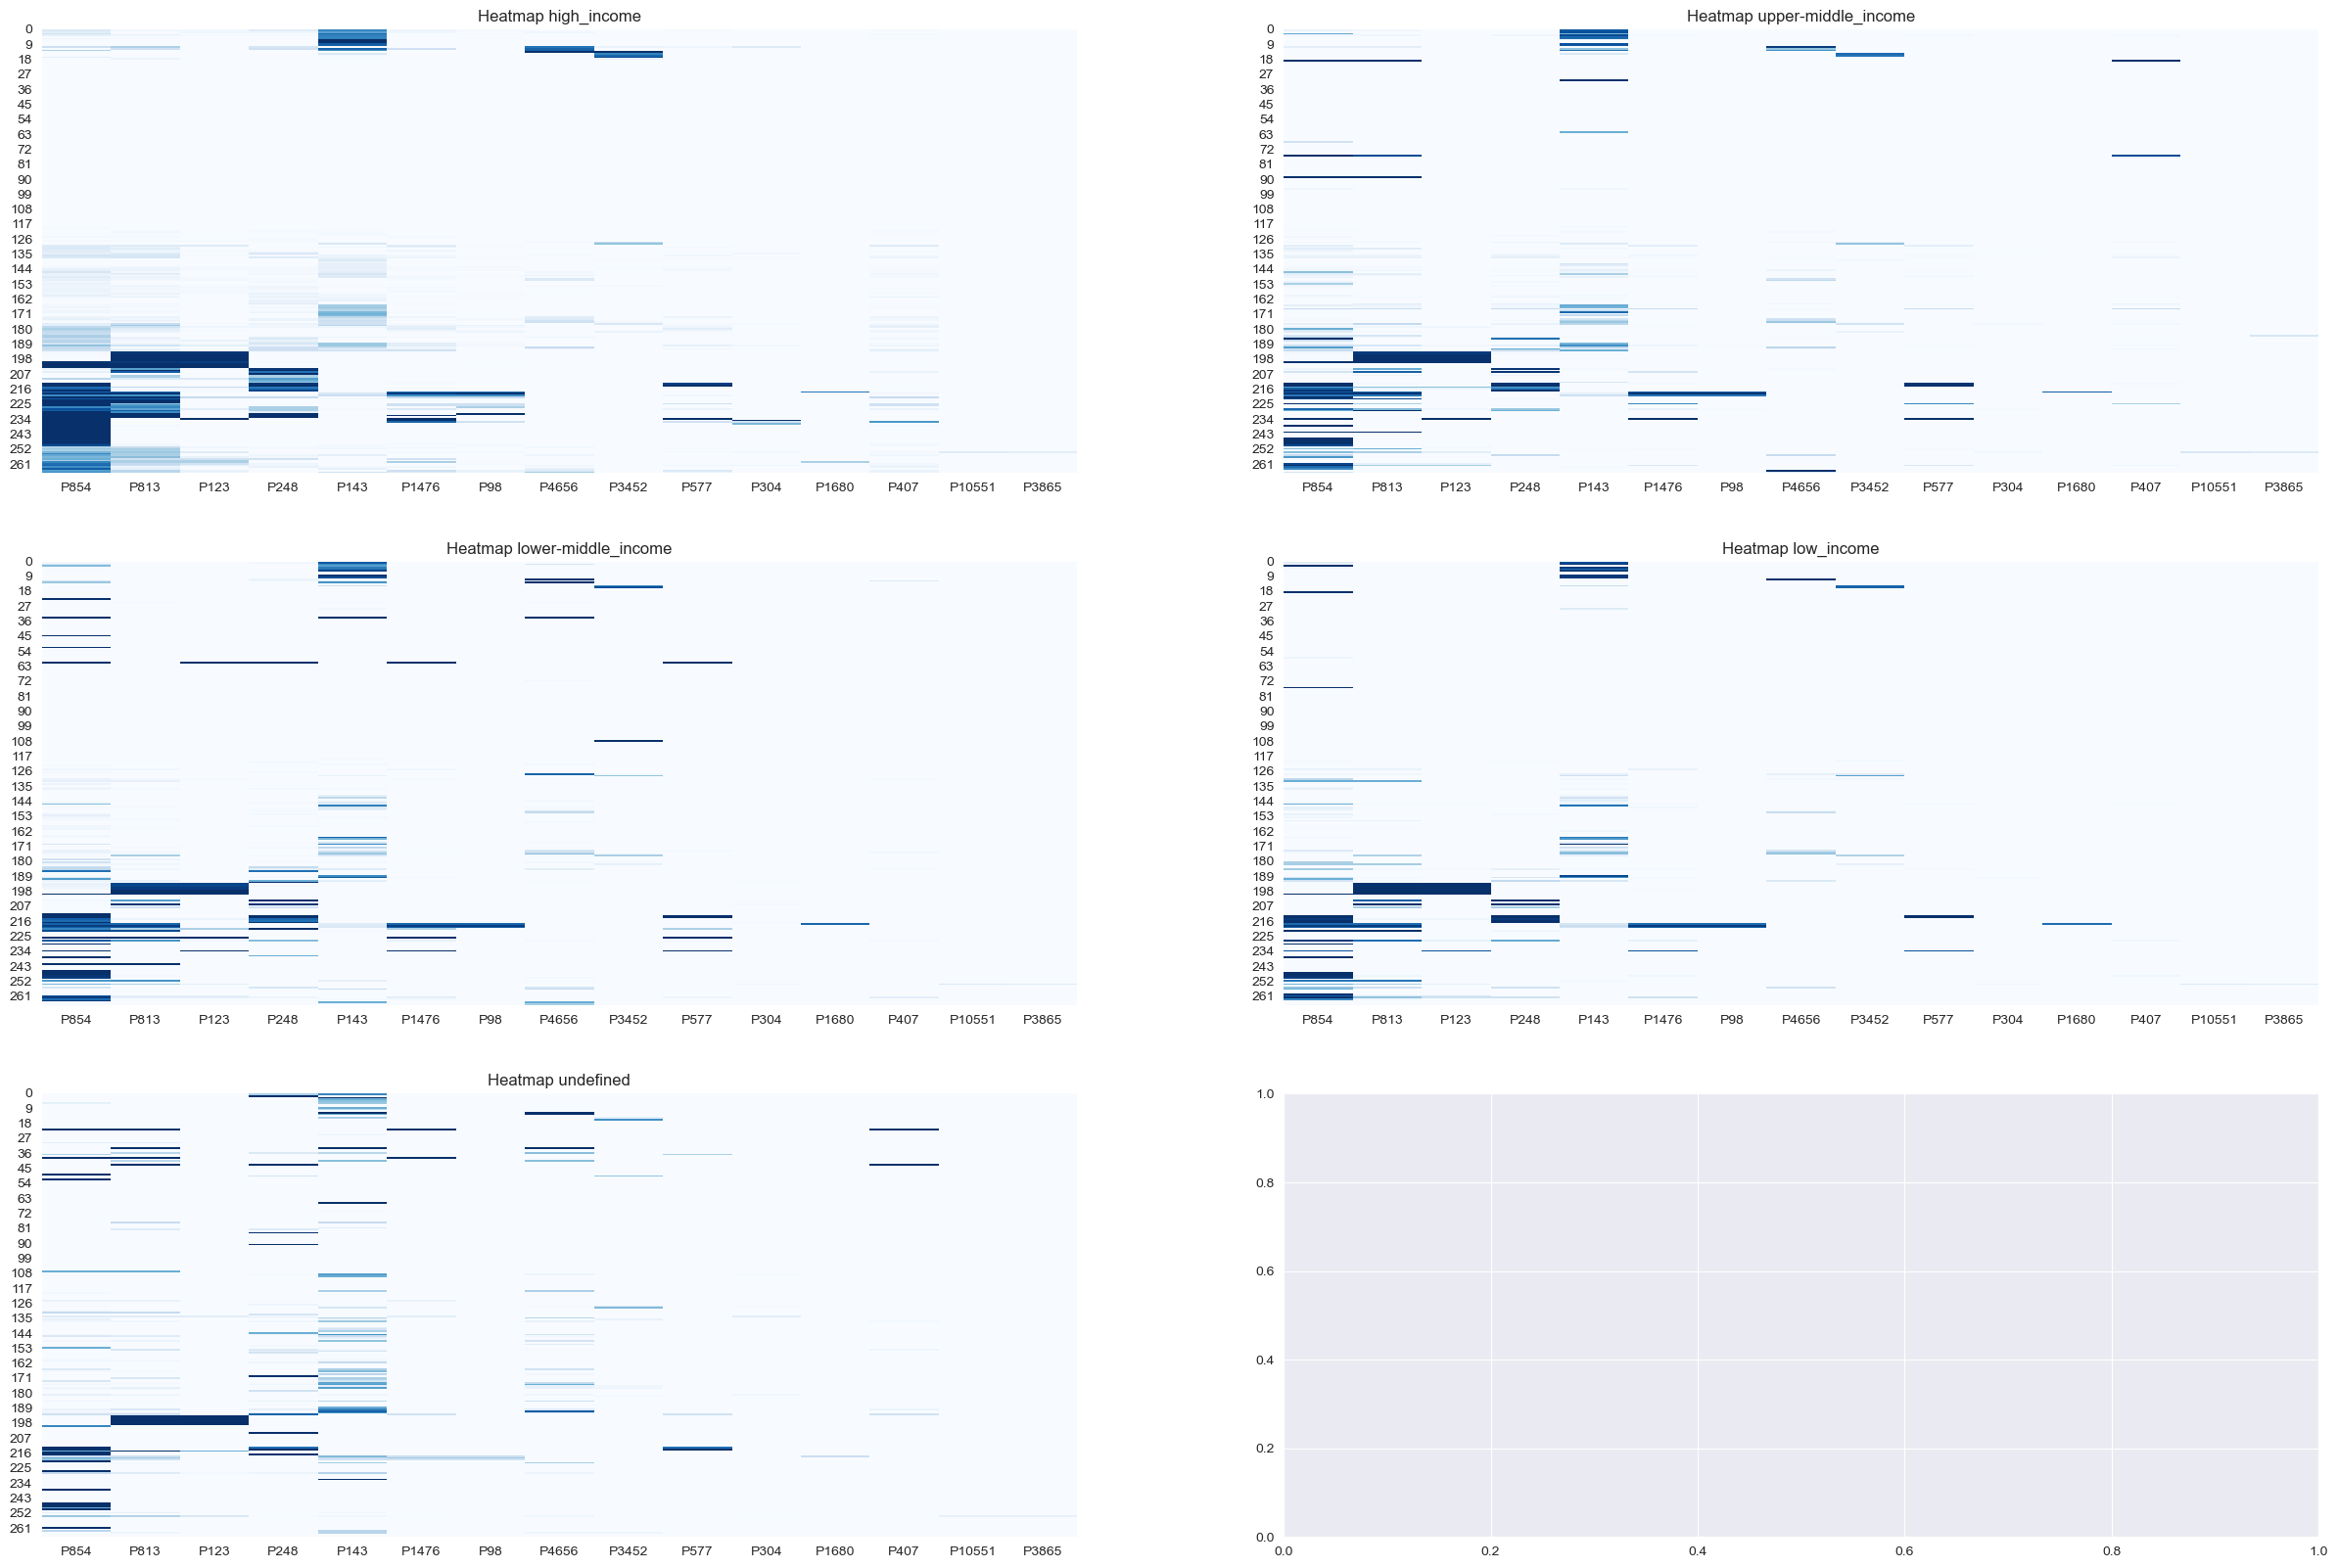

In [95]:

k = 15
x_labels = common_reference_pids[:k]
x_labels = [x[0] for x in x_labels]

import seaborn as sns

all_pids = set()
for key, value in country_references_stats.items():
    for rel_pid, rel_value in value.items():
        all_pids.add(rel_pid)


ref_pids_to_idx = {x: idx for idx, x in enumerate(x_labels)}
pid_to_idx = {rel_pid: idx for idx, rel_pid in enumerate(all_pids)}

def create_datasets(country_references_stats, ref_pids_to_idx, pid_to_idx, k=15):
    datasets = []
    for key, value in country_references_stats.items():
        data = np.zeros((len(pid_to_idx), k))
        number_of_statements = np.zeros(len(pid_to_idx))
        for rel_pid, rel_value in value.items():
            data_point = np.zeros(k)
            for ref_pid, count in rel_value.items():
                if ref_pid != "total" and ref_pid != "total_with_ref" and ref_pid in ref_pids_to_idx:
                    normalized_value = count / rel_value["total"]
                    data_point[ref_pids_to_idx[ref_pid]] = normalized_value

            if np.any(data_point > 0):
                data[pid_to_idx[rel_pid]] = data_point
            number_of_statements[pid_to_idx[rel_pid]] = rel_value["total"]
        datasets.append((key, data, number_of_statements))
    return datasets

data = create_datasets(country_references_stats, ref_pids_to_idx, pid_to_idx, k=k)[0][1]
g = sns.clustermap(data, cmap="Blues", metric="euclidean", method="ward",cbar=False
                   , figsize=(8, 8))

reordered_x_indices = g.dendrogram_col.reordered_ind
reordered_y_indices = g.dendrogram_row.reordered_ind
reordered_x_indices = {idx: i for i, idx in enumerate(reordered_x_indices)}
reordered_y_indices = {idx: i for i, idx in enumerate(reordered_y_indices)}
x_labels = [x_labels[i] for i in reordered_x_indices]
plt.close()

ref_pids_to_idx = {x: reordered_x_indices[y] for x, y in ref_pids_to_idx.items()}
pid_to_idx = {rel_pid: reordered_y_indices[y] for rel_pid, y in pid_to_idx.items()}

datasets = create_datasets(country_references_stats, ref_pids_to_idx, pid_to_idx, k=k)
fig, axes = plt.subplots(3, 2, figsize=(30, 20))
for i, (key, data, _) in enumerate(datasets):
    sns.heatmap(data, annot=False, cmap="Blues", cbar=False,
            xticklabels=x_labels, ax=axes[i // 2, i % 2])

    axes[i // 2, i % 2].set_title(f"Heatmap {key}")


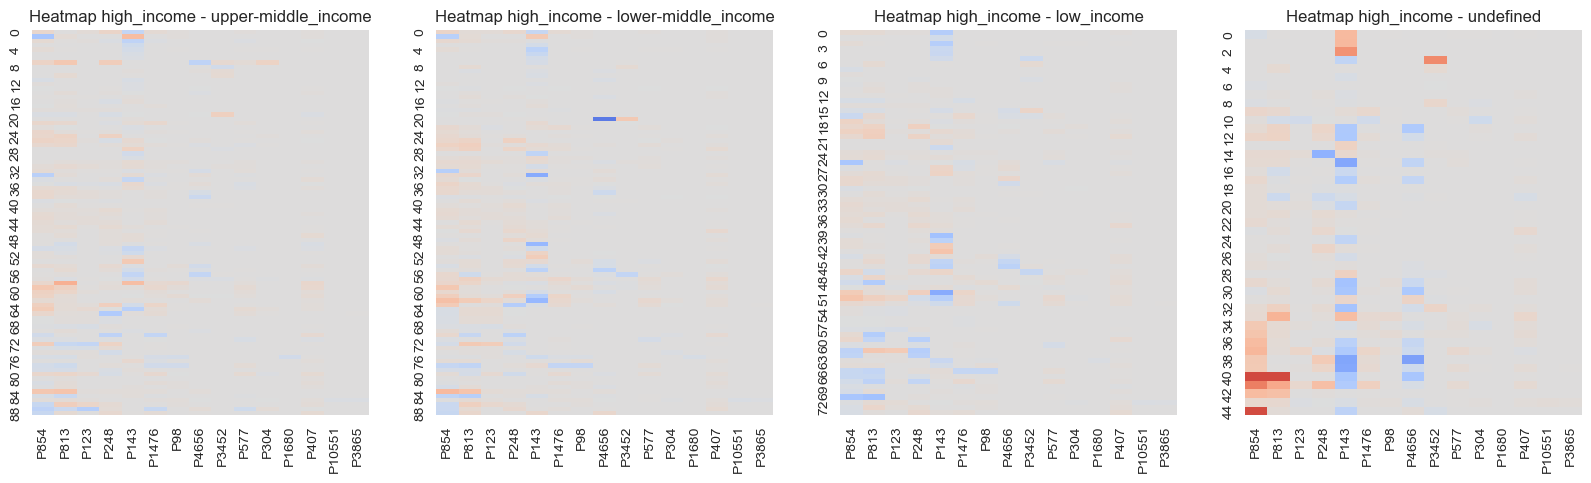

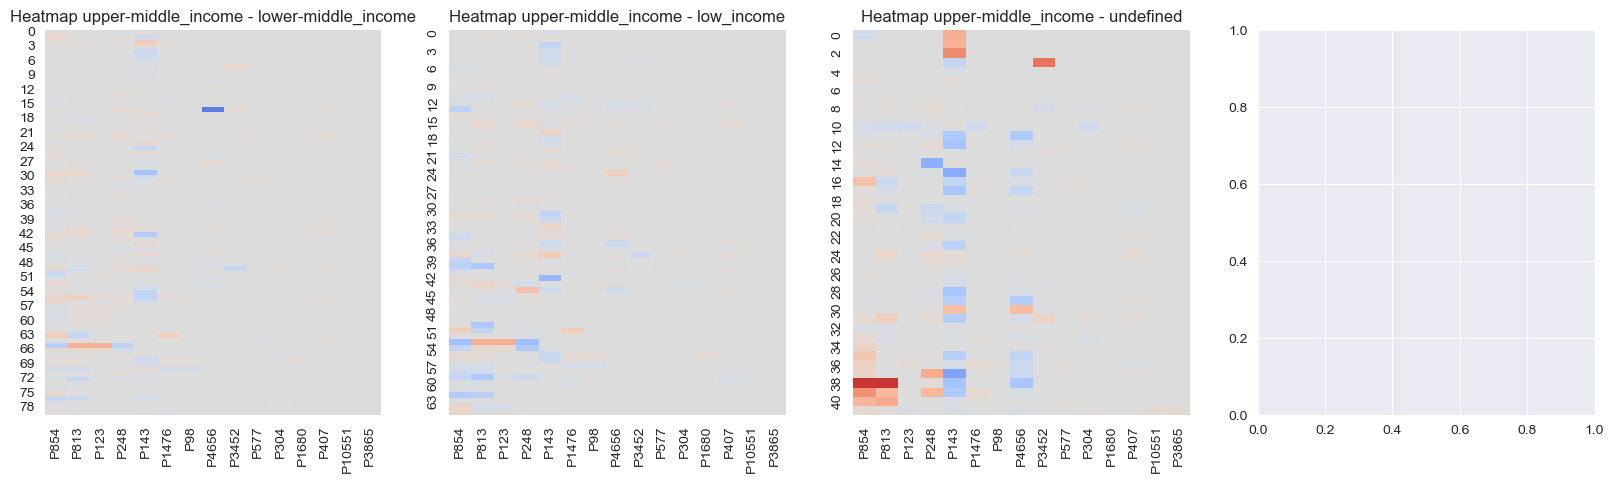

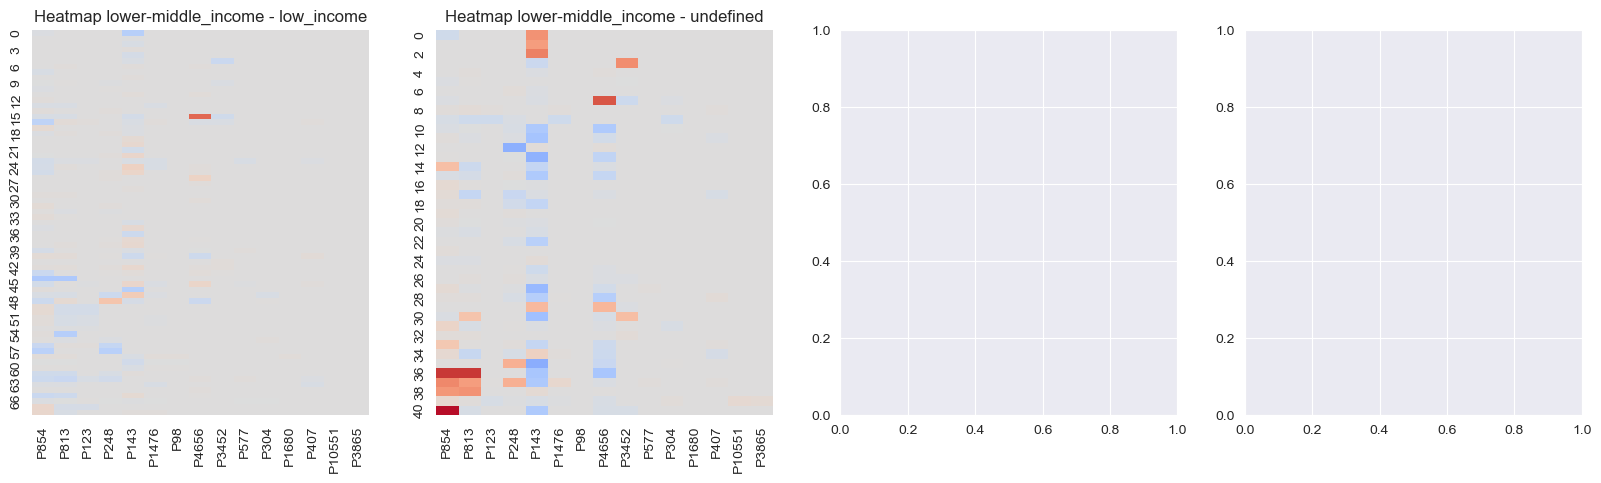

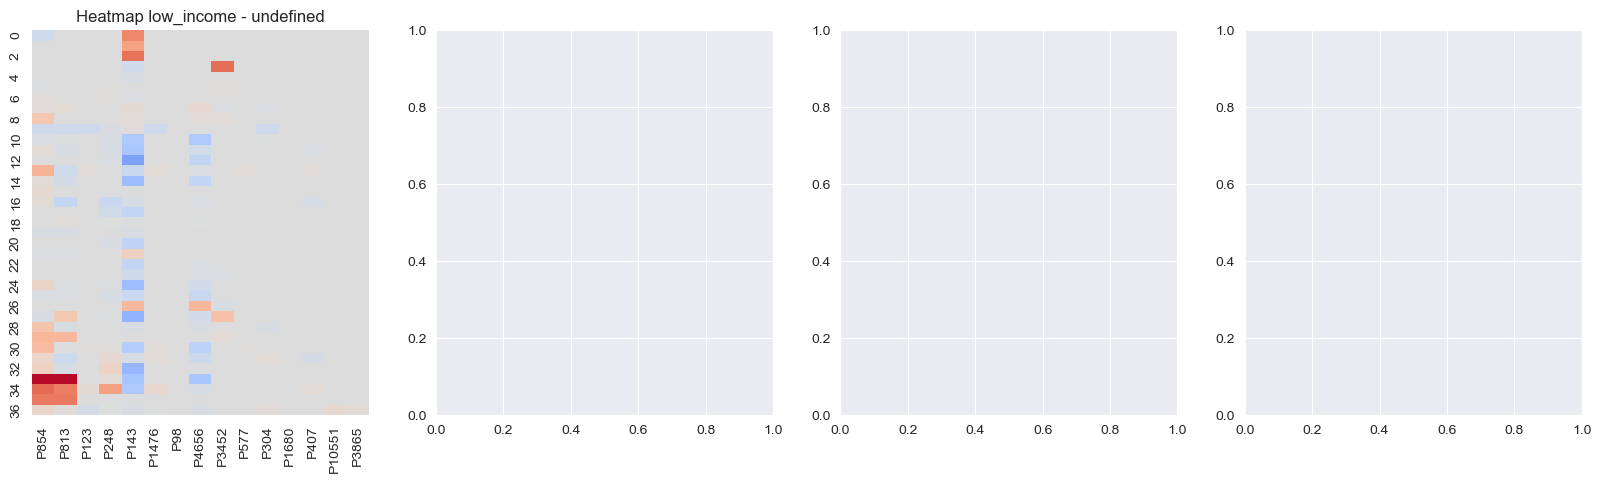

In [96]:

for idx, (key, data, ns) in enumerate(datasets):
    if len(datasets[idx+1:]) == 0:
        break
    fig, axes = plt.subplots(1, len(datasets) - 1, figsize=(20, 5))
    for idx2, (key2, data2, ns_2) in enumerate(datasets[idx+1:]):
        diff = data - data2
        to_mask = np.abs(diff) < 0.01
        to_mask = np.logical_or(to_mask, np.logical_or(ns < 20, ns_2 < 20).reshape(-1, 1))

        rows_to_eliminate = np.all(to_mask, axis=1)
        diff = np.delete(diff, np.where(rows_to_eliminate), axis=0)

        sns.heatmap(diff, annot=False, cmap="coolwarm", cbar=False,
                xticklabels=x_labels, ax=axes[idx2], vmax=1.0, vmin=-1.0)

        axes[idx2].set_title(f"Heatmap {key} - {key2}")

plt.show()



